In [1]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
#import torch
from sklearn import datasets
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu11.41+23-CA (build 11.0.8+10-LTS, mixed mode)
  Starting server from C:\Users\lrocha\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\lrocha\AppData\Local\Temp\tmphi_kqef6
  JVM stdout: C:\Users\lrocha\AppData\Local\Temp\tmphi_kqef6\h2o_lrocha_started_from_python.out
  JVM stderr: C:\Users\lrocha\AppData\Local\Temp\tmphi_kqef6\h2o_lrocha_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_lrocha_hkfkq9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.969 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [36]:
#h2o.get_frame(r'C:/Users/lrocha/Documents/Kaggle/Titanic/data/train.csv')
df = pd.read_csv(r'C:/Users/lrocha/Documents/Kaggle/Titanic/data/train.csv', encoding="utf-8", sep=',',decimal='.')

In [37]:
df = df.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)

In [38]:
df_na_1 = df.loc[~df['Age'].isna()].dropna()
df_na_0 = df.loc[df['Age'].isna()]

In [39]:
predict_age = h2o.H2OFrame(df_na_1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [42]:
predict_age

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.25,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.925,S
1,1,female,35,1,0,53.1,S
0,3,male,35,0,0,8.05,S
0,1,male,54,0,0,51.8625,S
0,3,male,2,3,1,21.075,S
1,3,female,27,0,2,11.1333,S
1,2,female,14,1,0,30.0708,C
1,3,female,4,1,1,16.7,S


In [43]:
train_age, test_age = predict_age.split_frame(ratios=[.7])

x = train_age.columns
y = 'Age'
x.remove(y)

In [45]:
aml_age = H2OAutoML(seed=1,
                project_name = 'predicting_age',
                max_models = 10)

aml_age.train(x=x,
          y=y,
          training_frame=train_age,
          leaderboard_frame=test_age)



AutoML progress: |
10:35:00.178: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [46]:
lb_age = h2o.automl.get_leaderboard(aml_age, extra_columns = 'ALL')
lb_age.head(3)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
GBM_grid__1_AutoML_20210212_103500_model_1,149.25,12.2168,149.25,9.66138,0.608566,39,0.006363
StackedEnsemble_AllModels_AutoML_20210212_103500,149.83,12.2405,149.83,9.72331,0.616408,113,0.020604
StackedEnsemble_BestOfFamily_AutoML_20210212_103500,149.998,12.2474,149.998,9.72852,0.616592,110,0.064434


In [47]:
aml_age.leader.predict(test_age.head(5))

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
17.3329
20.5119
6.6414
46.816
32.2795


In [48]:
test_age.head(5)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,3,female,27,0,2,11.1333,S
1,3,female,4,1,1,16.7,S
0,3,male,2,4,1,29.125,Q
0,1,male,40,0,0,27.7208,C
0,2,male,66,0,0,10.5,S


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
GBM_grid__1_AutoML_20210212_103500_model_1,149.25,12.2168,149.25,9.66138,0.608566,39,0.006363
StackedEnsemble_AllModels_AutoML_20210212_103500,149.83,12.2405,149.83,9.72331,0.616408,113,0.020604
StackedEnsemble_BestOfFamily_AutoML_20210212_103500,149.998,12.2474,149.998,9.72852,0.616592,110,0.064434
GBM_2_AutoML_20210212_103500,151.24,12.298,151.24,9.81925,0.619999,40,0.006758
GBM_3_AutoML_20210212_103500,151.467,12.3072,151.467,9.85596,0.620981,40,0.007201
GBM_4_AutoML_20210212_103500,153.949,12.4076,153.949,9.88024,0.620874,38,0.00802
DRF_1_AutoML_20210212_103500,154.729,12.439,154.729,9.81032,0.597377,73,0.013511
GBM_1_AutoML_20210212_103500,159.696,12.6371,159.696,9.98263,0.599964,37,0.009801
DeepLearning_1_AutoML_20210212_103500,160.159,12.6554,160.159,10.2552,0.662615,29,0.003261
GLM_1_AutoML_20210212_103500,163.931,12.8036,163.931,10.1736,0.660832,46,0.001472


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

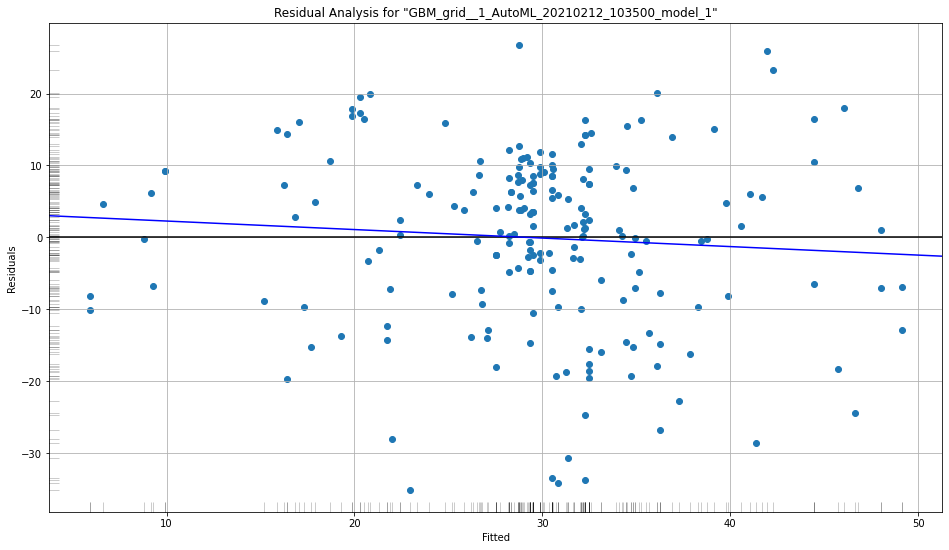

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

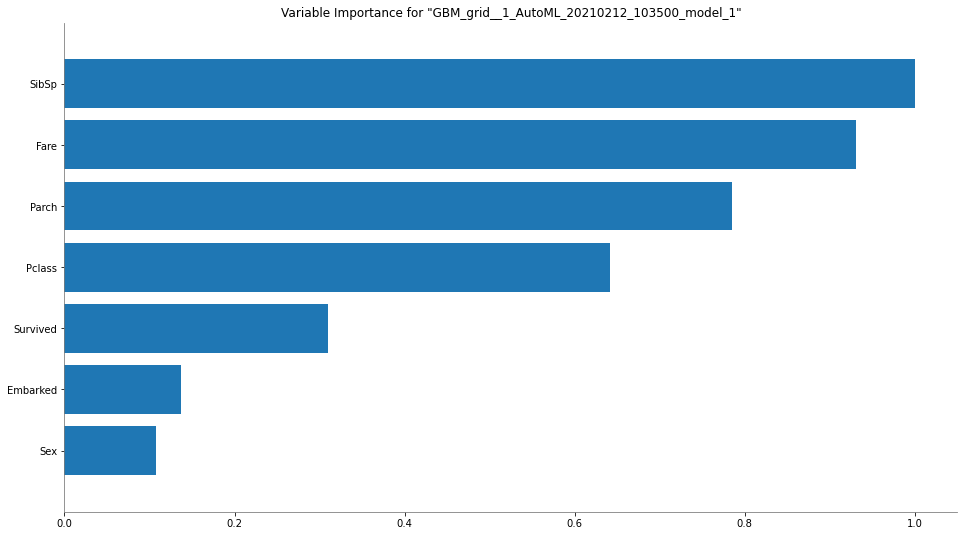

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

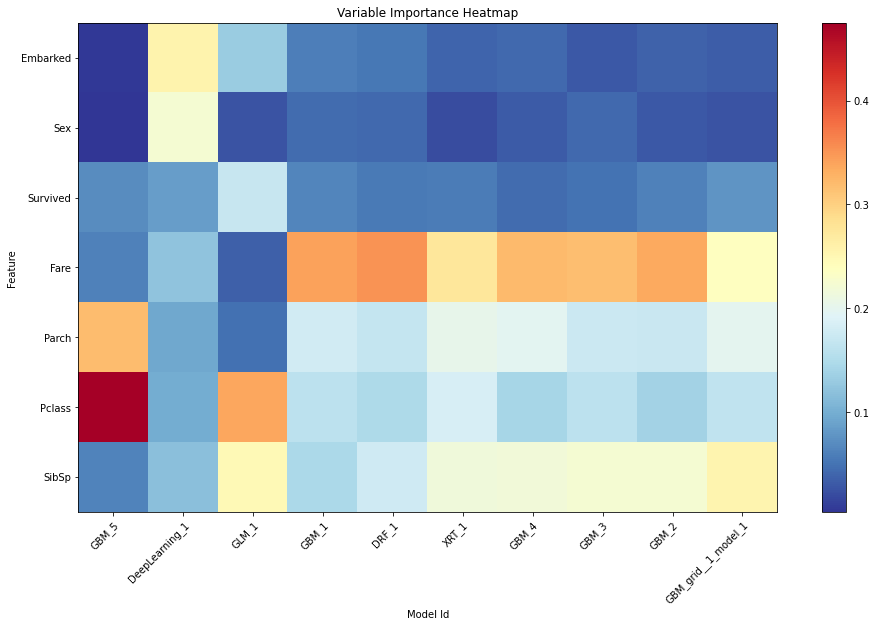

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

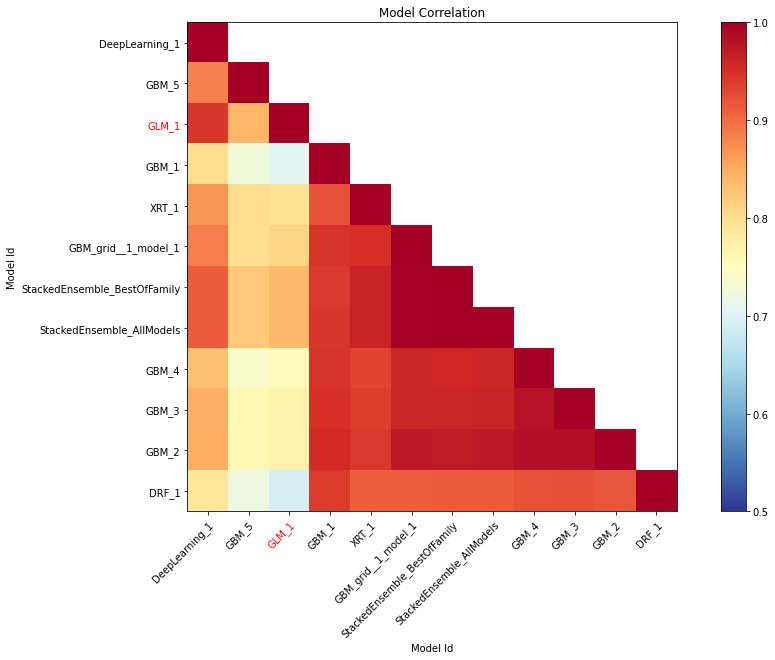

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

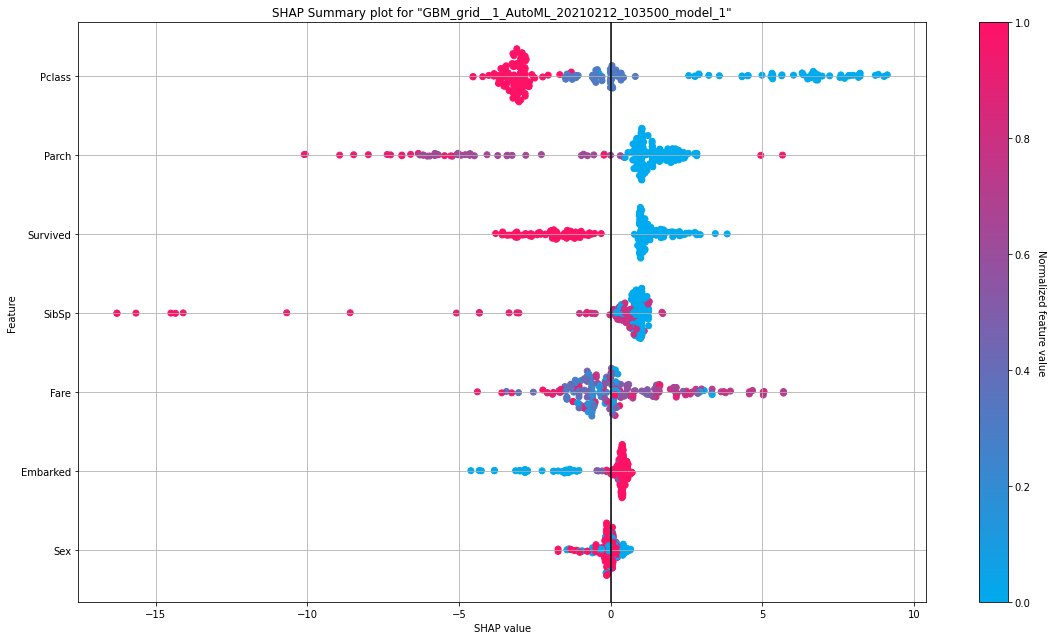

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

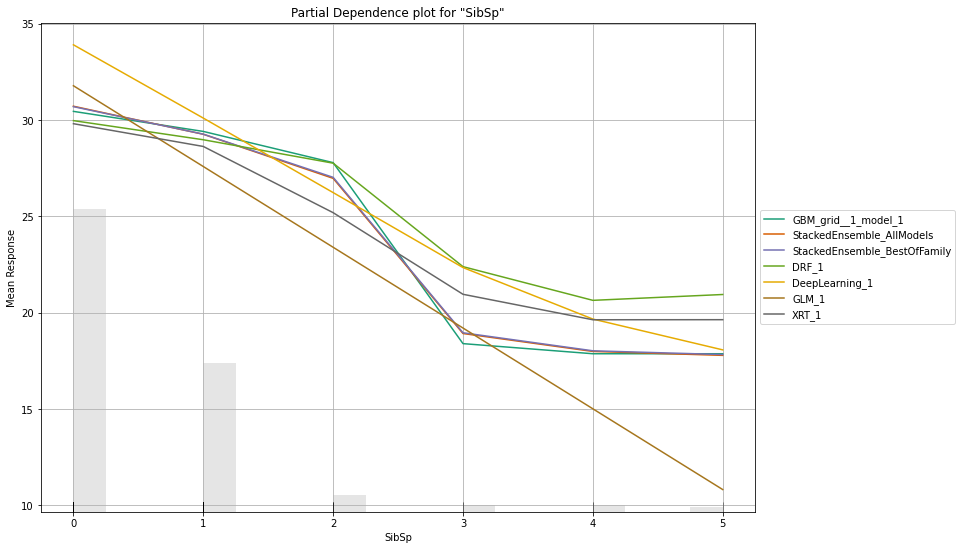

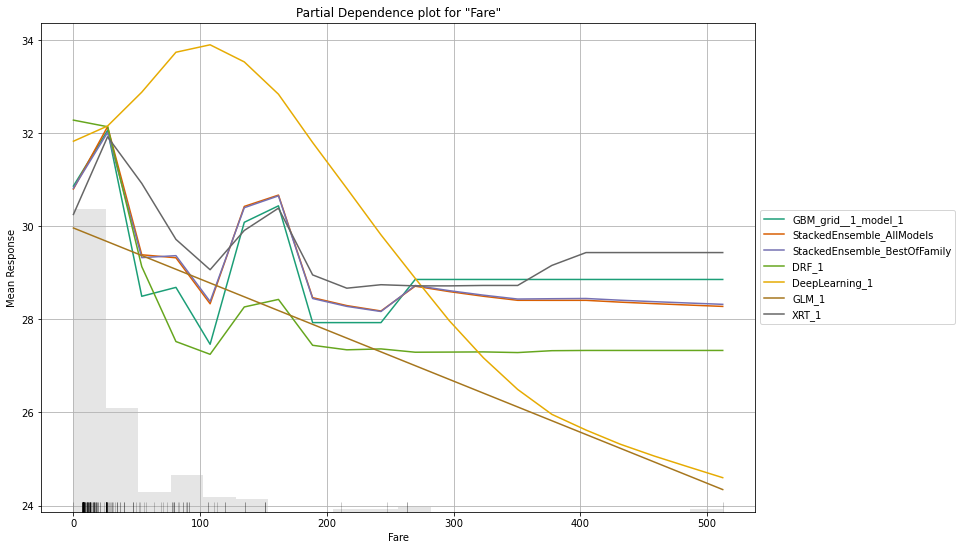

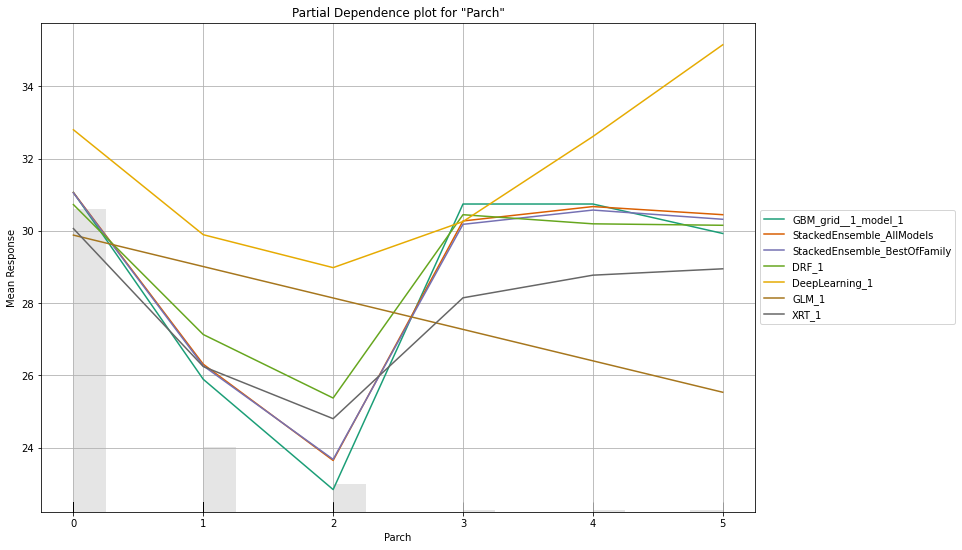

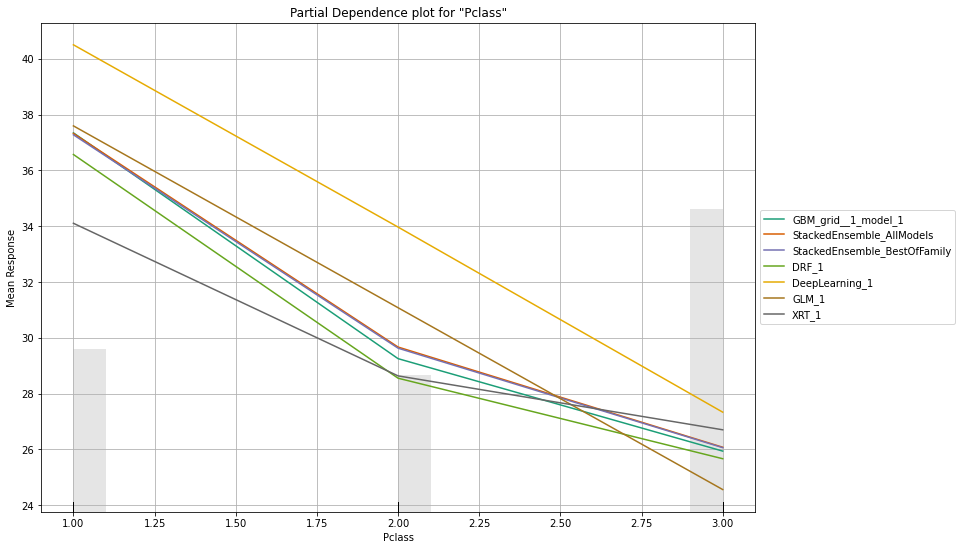

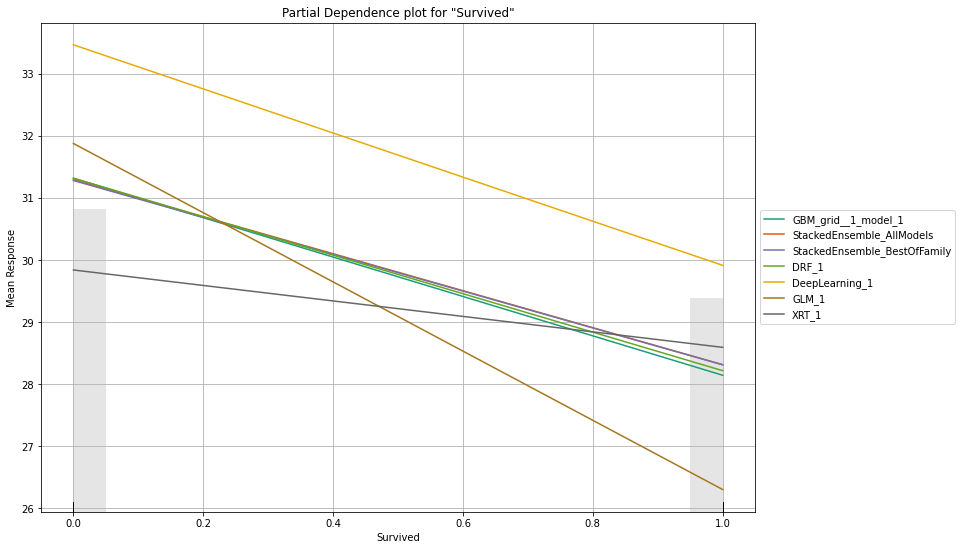

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

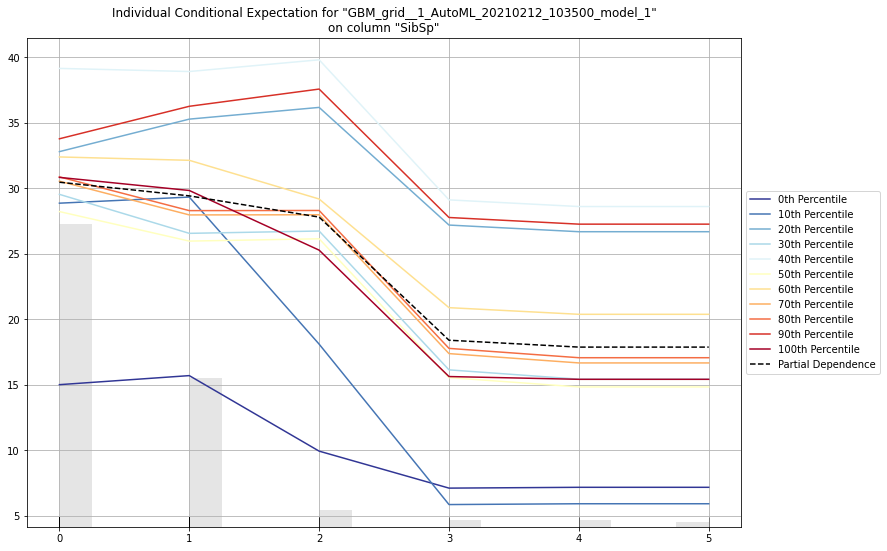

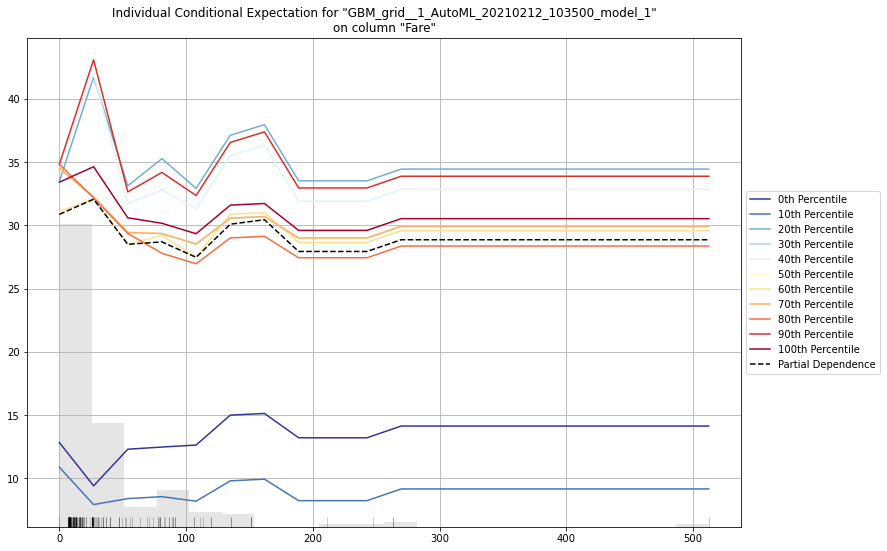

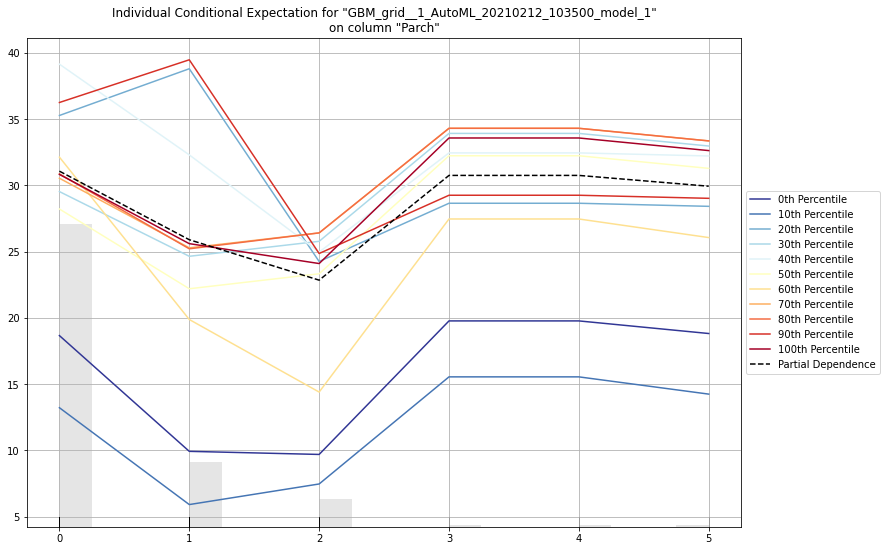

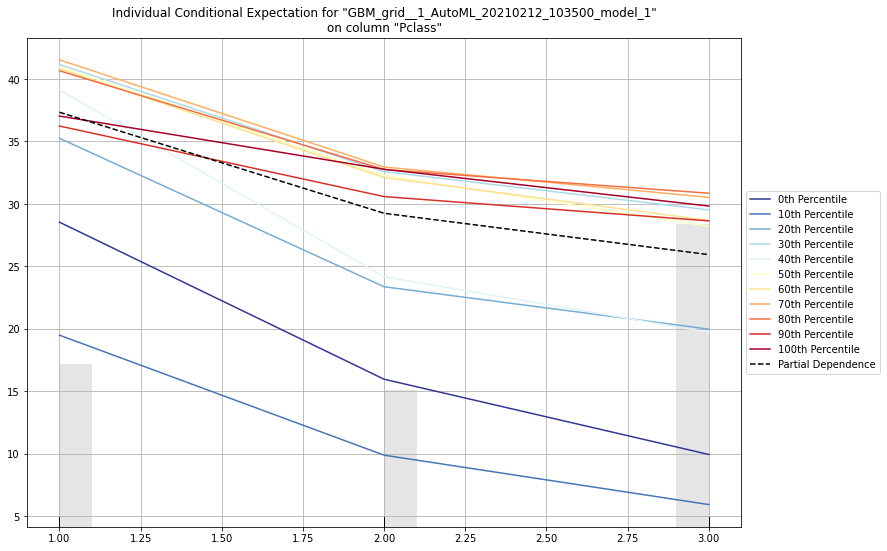

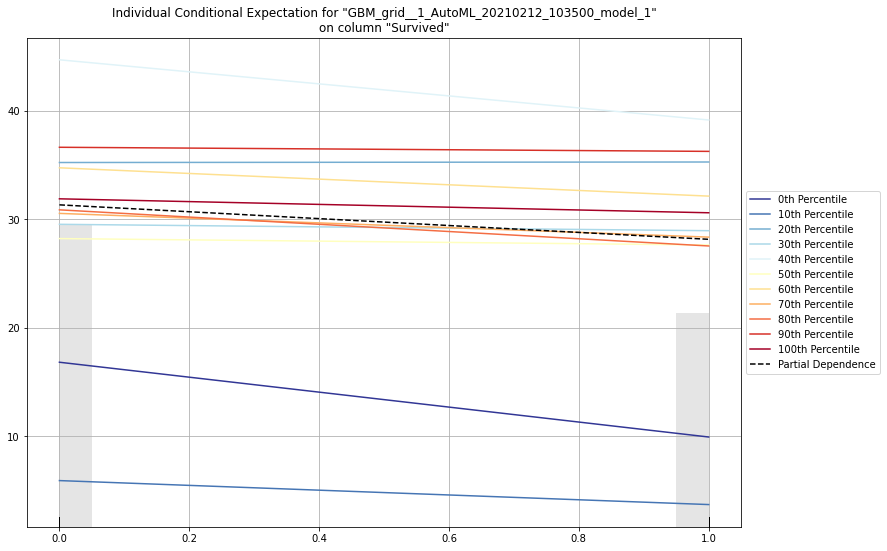

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
GBM_grid__1_AutoML_20210212_103500_model_1,149.25,12.2168,149.25,9.66138,0.608566,39,0.006363
StackedEnsemble_AllModels_AutoML_20210212_103500,149.83,12.2405,149.83,9.72331,0.616408,113,0.020604
StackedEnsemble_BestOfFamily_AutoML_20210212_103500,149.998,12.2474,149.998,9.72852,0.616592,110,0.064434
GBM_2_AutoML_20210212_103500,151.24,12.298,151.24,9.81925,0.619999,40,0.006758
GBM_3_AutoML_20210212_103500,151.467,12.3072,151.467,9.85596,0.620981,40,0.007201
GBM_4_AutoML_20210212_103500,153.949,12.4076,153.949,9.88024,0.620874,38,0.00802
DRF_1_AutoML_20210212_103500,154.729,12.439,154.729,9.81032,0.597377,73,0.013511
GBM_1_AutoML_20210212_103500,159.696,12.6371,159.696,9.98263,0.599964,37,0.009801
DeepLearning_1_AutoML_20210212_103500,160.159,12.6554,160.159,10.2552,0.662615,29,0.003261
GLM_1_AutoML_20210212_103500,163.931,12.8036,163.931,10.1736,0.660832,46,0.001472


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

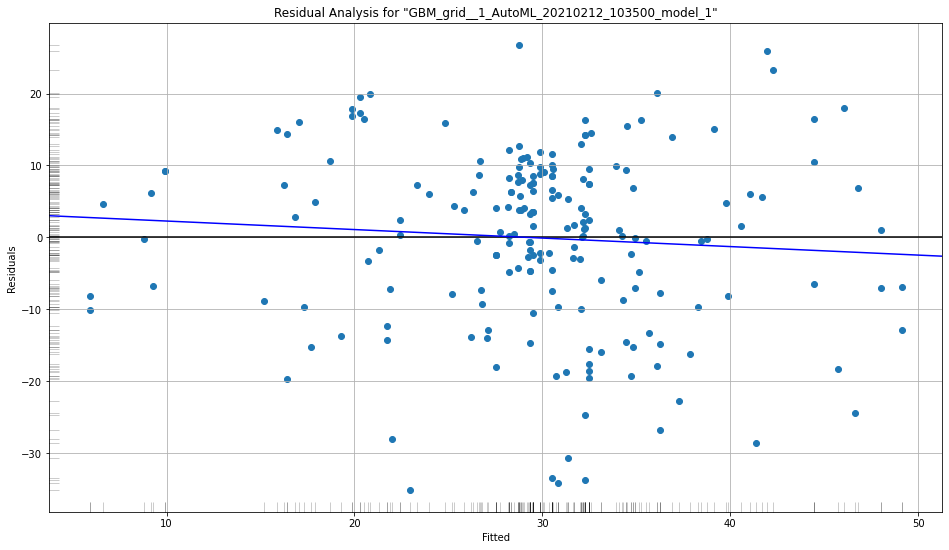

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

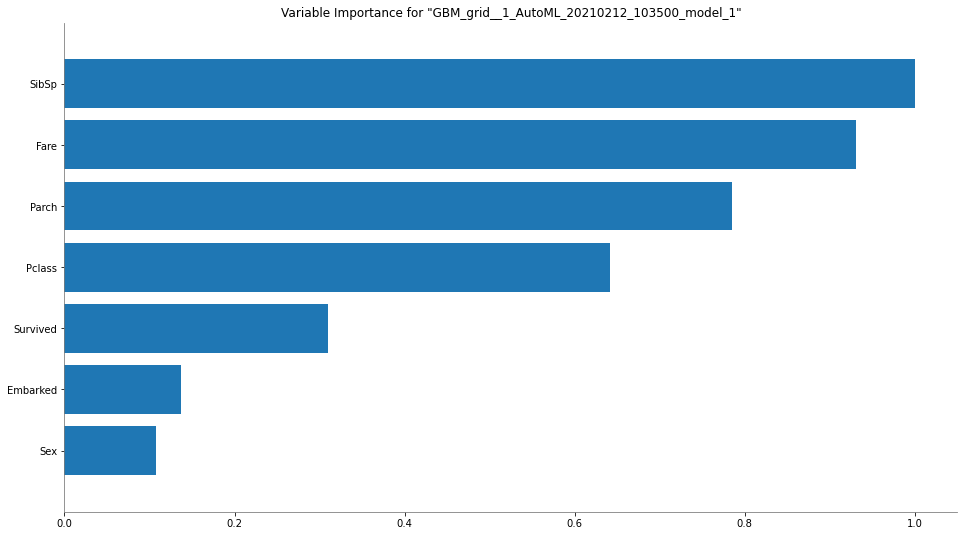

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

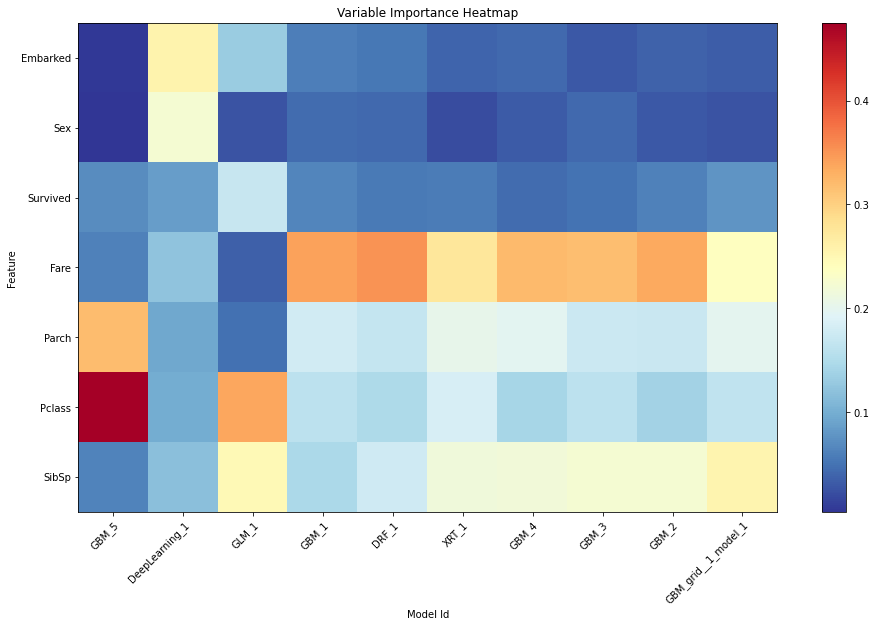

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

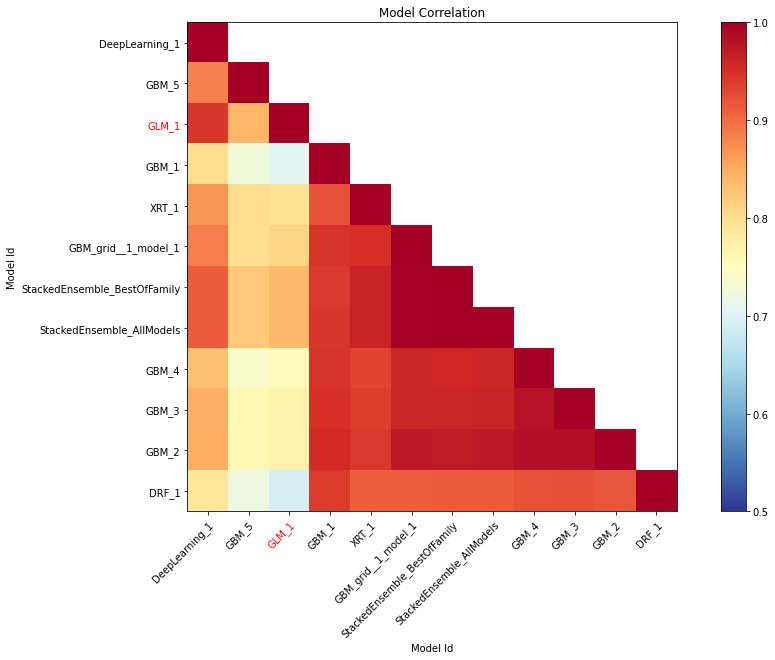

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

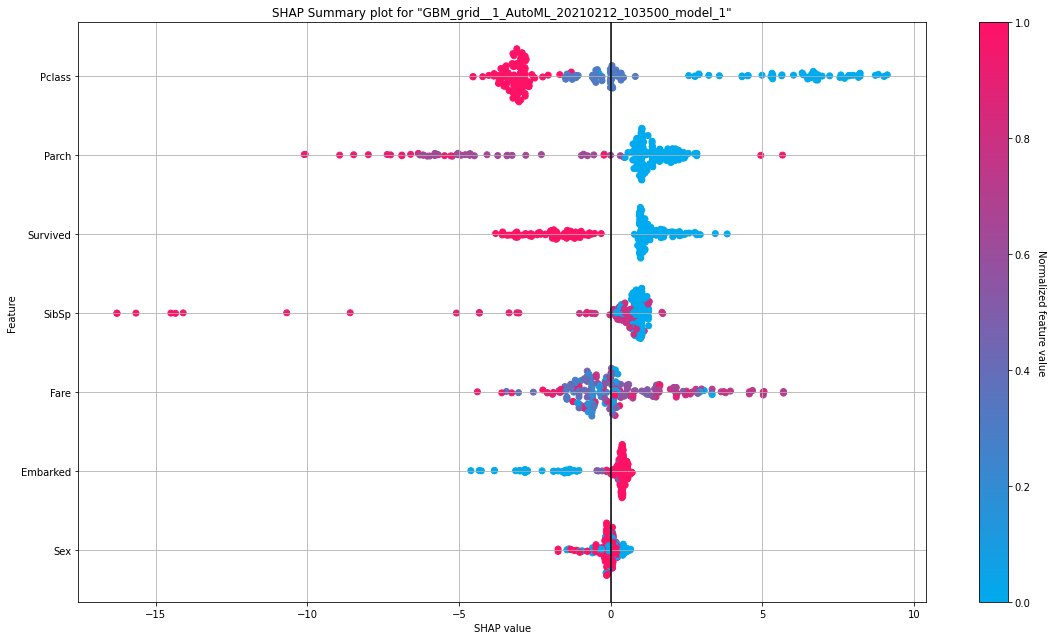

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

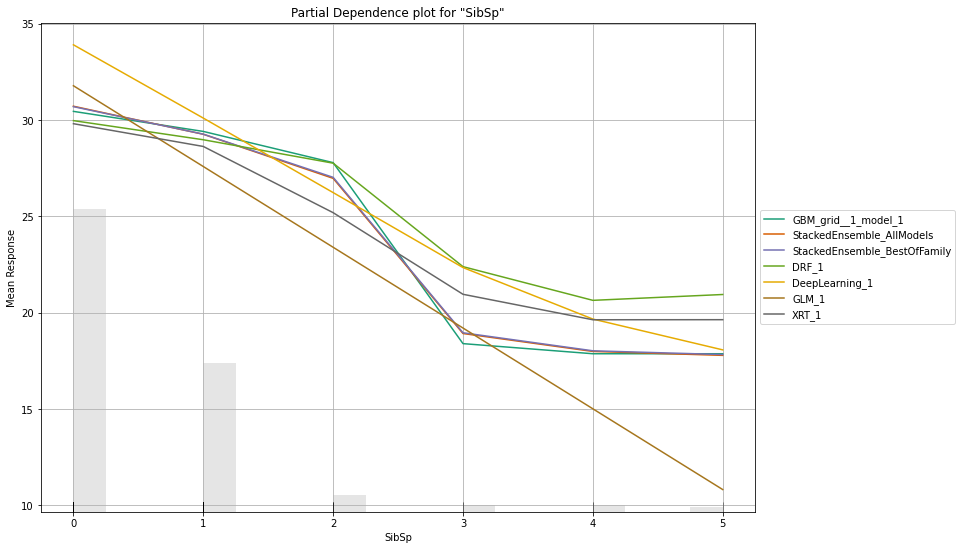

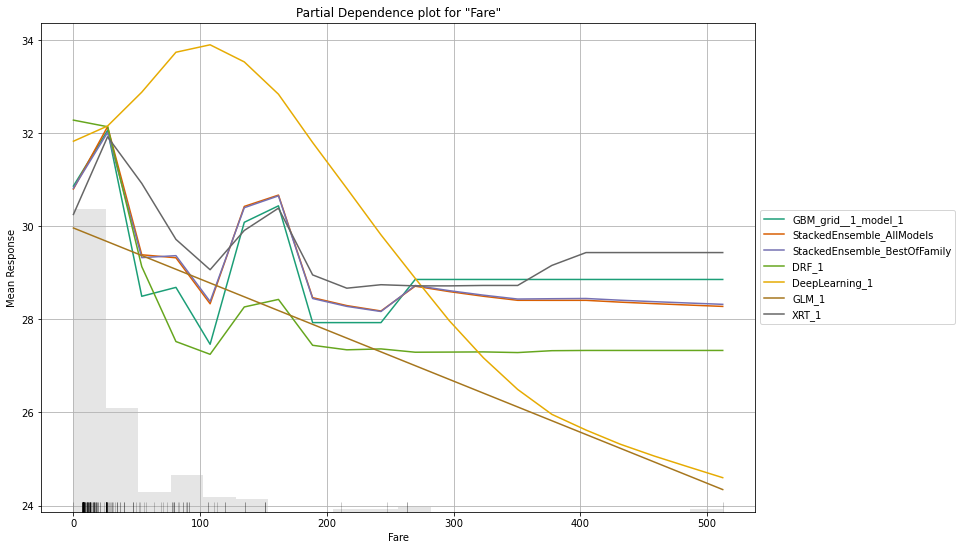

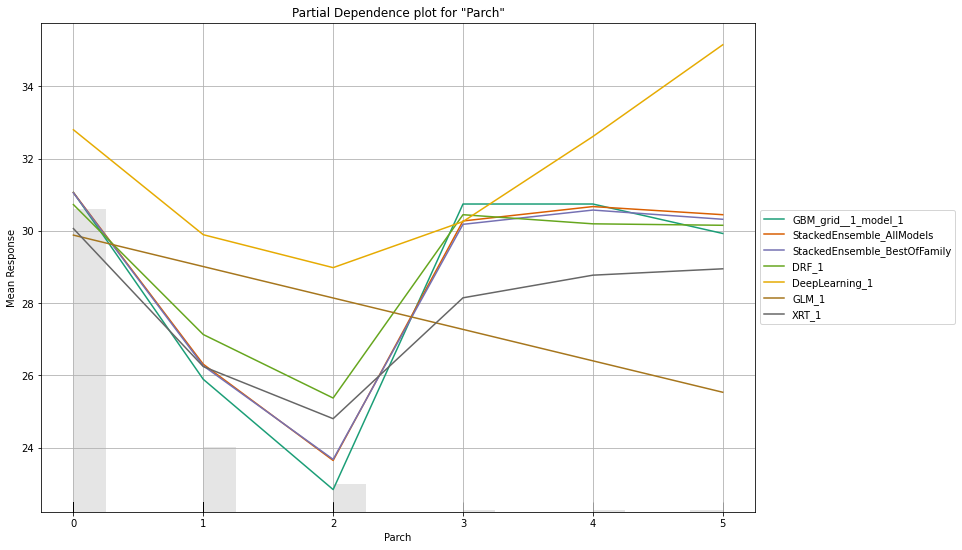

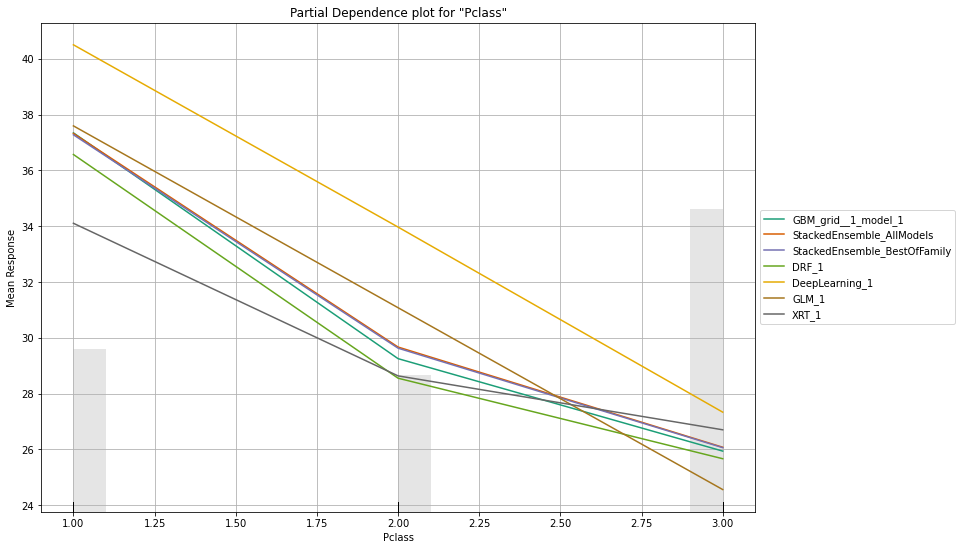

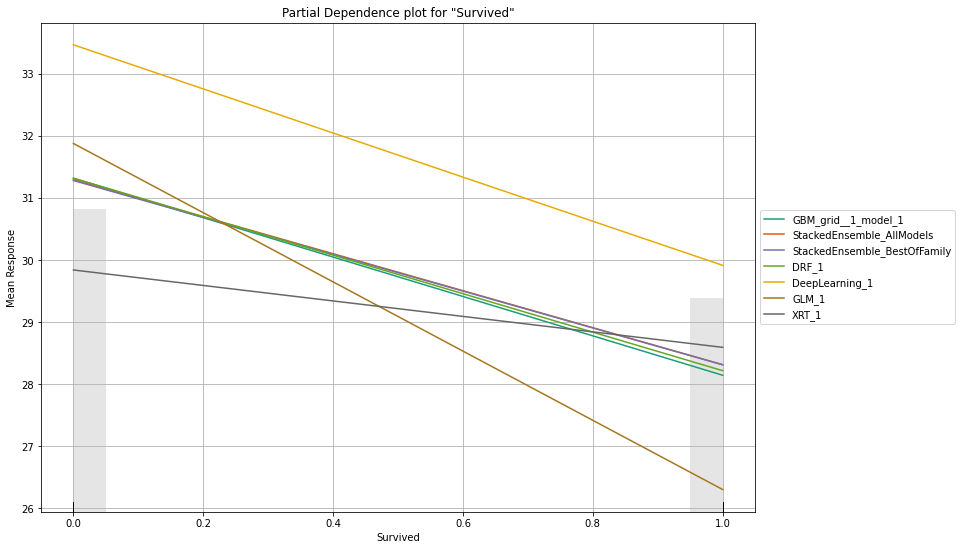

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

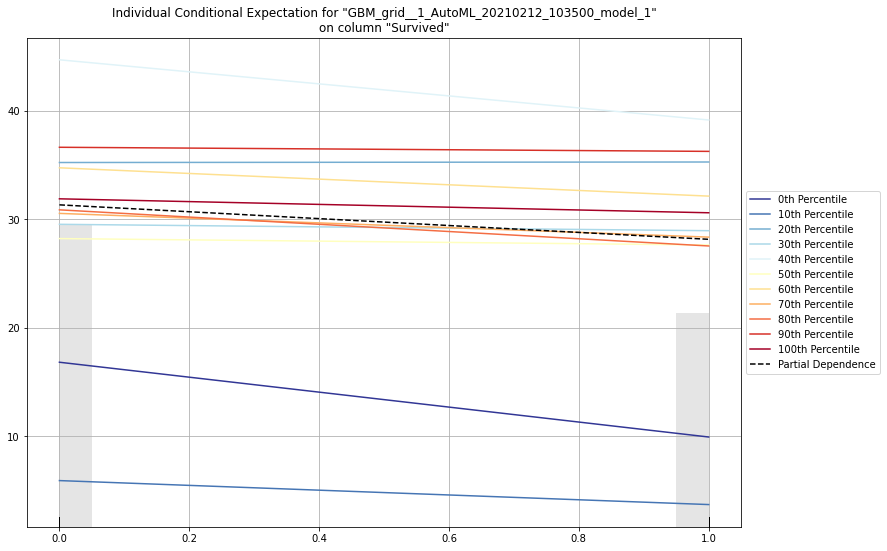

In [49]:
aml_age.explain(test_age)

In [50]:
aml_age.leader.r2()

0.4770288912202729

In [62]:
aml_age.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210212_103500_model_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,38.0,38.0,7989.0,4.0,4.0,4.0,8.0,15.0,12.131579




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 106.26882498319972
RMSE: 10.30867716941411
MAE: 7.9409307461005065
RMSLE: 0.462105638059576
Mean Residual Deviance: 106.26882498319972

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 137.04838402718462
RMSE: 11.706766591471132
MAE: 9.143510827174131
RMSLE: 0.5204584466237202
Mean Residual Deviance: 137.04838402718462

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,9.143372,0.5981138,9.500583,8.31221,9.894908,8.936764,9.072392
1,mean_residual_deviance,137.03741,21.113161,164.63596,108.98364,149.67328,130.43727,131.45694
2,mse,137.03741,21.113161,164.63596,108.98364,149.67328,130.43727,131.45694
3,r2,0.31349662,0.116835944,0.3231981,0.40197483,0.13512626,0.27727428,0.42990968
4,residual_deviance,137.03741,21.113161,164.63596,108.98364,149.67328,130.43727,131.45694
5,rmse,11.678212,0.90607303,12.831055,10.439524,12.234103,11.420914,11.465467
6,rmsle,0.5174368,0.062915556,0.49763724,0.51760644,0.43139976,0.60531515,0.5352255



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-02-12 11:35:09,0.082 sec,0.0,14.254897,11.134747,203.202095
1,,2021-02-12 11:35:09,0.087 sec,5.0,12.562671,9.960214,157.820708
2,,2021-02-12 11:35:09,0.092 sec,10.0,11.752556,9.291952,138.122578
3,,2021-02-12 11:35:09,0.096 sec,15.0,11.197481,8.786804,125.383589
4,,2021-02-12 11:35:09,0.099 sec,20.0,10.921531,8.525543,119.279832
5,,2021-02-12 11:35:09,0.102 sec,25.0,10.698740,8.311105,114.463036
6,,2021-02-12 11:35:09,0.105 sec,30.0,10.530785,8.148553,110.897427
7,,2021-02-12 11:35:09,0.108 sec,35.0,10.357188,7.988254,107.271337
8,,2021-02-12 11:35:09,0.119 sec,38.0,10.308677,7.940931,106.268825



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,SibSp,65469.015625,1.000000,0.255557
1,Fare,60963.023438,0.931174,0.237968
2,Parch,51401.906250,0.785133,0.200647
3,Pclass,42008.832031,0.641660,0.163981
4,Survived,20309.302734,0.310212,0.079277
5,Embarked,9006.314453,0.137566,0.035156
6,Sex,7022.877441,0.107270,0.027414


In [67]:
%%capture
aml_age

In [69]:
aml_age

In [55]:
predicting_age = h2o.H2OFrame(df_na_0.drop('Age',axis=1))


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [58]:
age_predicted = aml_age.leader.predict(predicting_age)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [61]:
age_predicted

predict
29.0187
32.2084
17.8744
27.5293
24.2063
29.5226
37.8128
23.3404
22.3998
26.5238


In [70]:
age_predicted

predict
29.0187
32.2084
17.8744
27.5293
24.2063
29.5226
37.8128
23.3404
22.3998
26.5238
